# EMG data for gestures NN

In [1]:
## Importing libraries

# Stop warnings from scikit-learn
import warnings 
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

#==== Importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot

#Import Keras
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.layers import Activation

Using TensorFlow backend.


In [20]:
## defining functions

def getdata(): #========= importing data from different files
    
    filename = 'E:\\ML\\ML test 1 - UCI database - EMG data for gestures Data Set\\train_data_set2.csv'
    dataset = pd.read_csv(filename, sep = ';')
    X = dataset.iloc[:,:-1].values
    y = dataset.iloc[:,-1].values
    y = y.reshape((len(y),1))

    print('Data loaded...')

    return X,y

def prepdata(X,y): #==== preparing data for Model
    
    # --- use onehotencoder on labels
    y = to_categorical(y)
    
    #--- Splitting the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)
    #y.reshape((y.shape[0],1))
    
    #--- Feature Scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    print('Data prepared...')

    return X_train, X_test, y_train, y_test

def compilemodel(indim, activationtype, dropout, outdim): #==== Preparing and fitting Model
    
    # Initialising Neural Network
    model = Sequential()

    # Adding layers
    # Hidden layer 1
    model.add(Dense(name = 'L1', kernel_initializer='uniform', units = 128, activation = activationtype, input_dim = indim, kernel_constraint=maxnorm(3)))
    model.add(Dropout(dropout))
    
    #Hidden layer 2
    model.add(Dense(name = 'L2', kernel_initializer='uniform', units = 64,  activation = activationtype, kernel_constraint=maxnorm(3)))
    model.add(Dropout(dropout))
    
    #Hidden layer 3
    model.add(Dense(name = 'L3', kernel_initializer='uniform', units = 32,  activation = activationtype, kernel_constraint=maxnorm(3)))
    model.add(Dropout(dropout))
    
    # Outputlayer
    model.add(Dense(name = 'Lout', units = outdim, kernel_initializer='uniform', activation = 'sigmoid'))
        
    # Compiling the Neural Network
    sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    #model.summary()
    
    print('Model compiled...')
    
    return model

def trainmodel(model, X_train, X_test, y_train, y_test):
    
    print('Model is being trained...')
    
    # Create EarlyStopping trigger and Modelcheck
    #es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=5)
    #mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=0, save_best_only=True)
    
    # fit model
    #history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = bsize, epochs = eps,verbose=verb, callbacks=[es,mc])
    #history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = bsize, epochs = eps,verbose=verb, callbacks=[es])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = bsize, epochs = eps,verbose=verb)

    # evaluate the model
    _, train_acc = model.evaluate(X_train, y_train, verbose=verb)
    _, test_acc = model.evaluate(X_test, y_test, verbose=verb)
    
    return history, train_acc, test_acc

def showresults(history, train_acc, test_acc): #=== presenting results
    
    print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
    # plot loss during training
    pyplot.subplot(211)
    pyplot.title('Loss')
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='test')
    pyplot.legend()
    # plot accuracy during training
    print('\n')
    pyplot.subplot(212)
    pyplot.title('Accuracy')
    pyplot.plot(history.history['acc'], label='train')
    pyplot.plot(history.history['val_acc'], label='test')
    pyplot.legend()
    pyplot.show()

Data loaded...
Data prepared...
Model compiled...

Run with: indims = 64, activation = relu, dropout = 0.2, outdim = 6, batchsize = 64, epochs = 25
Model is being trained...
Train: 0.988, Test: 0.971




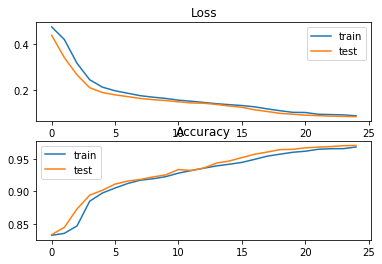

In [21]:
# MAIN PROGRAMM

#getting and prepping data
X,y = getdata() # load data
X_train, X_test, y_train, y_test = prepdata(X,y) # prep data

# setting model variables
indim = len(X[1])
outdim = len(y_train[1])
activationtype = 'relu'
dropout = 0.2  # no dropout (= 0.0) is prone to overfitting, dropout = 0.5 has slower learning curve
bsize = 64
eps = 25
verb = 0  # 0 = no output, 1 = max output, 2 = min output

#compiling and running model
model = compilemodel(indim, activationtype, dropout, outdim) # compile model
print('\nRun with: indims = {}, activation = {}, dropout = {}, outdim = {}, batchsize = {}, epochs = {}'.format(indim,activationtype,dropout,outdim,bsize,eps))
history, train_acc, test_acc = trainmodel(model, X_train, X_test, y_train, y_test) # compile and run model
showresults(history, train_acc, test_acc) # show results